In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Datasets/games-features.csv')
df = df.drop(columns=['QueryID', 'ResponseID', 'QueryName', 'PackageCount',
                      'AchievementHighlightedCount', 'AchievementCount', 'ControllerSupport', 'PCReqsHaveMin',
                      'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
                      'MacReqsHaveRec', 'SupportEmail', 'SupportURL', 'ExtUserAcctNotice',
                      'HeaderImage', 'LegalNotice', 'Website', 'PCMinReqsText',
                      'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText'])
print(df.shape)
df.head()

(13357, 53)


,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceCurrency,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages
0,Counter-Strike,Nov 1 2000,0,0,1,0,88,0,68991,1,...,USD,9.99,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,0,2439,1,...,USD,4.99,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish
2,Day of Defeat,May 1 2003,0,0,1,0,79,0,2319,1,...,USD,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish
3,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,0,888,1,...,USD,4.99,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish
4,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,0,2934,1,...,USD,4.99,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean


In [9]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df = df.loc[~df['ReleaseDate'].isnull()]
print(df.shape)
df.head()

(12872, 53)


,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceCurrency,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages
0,Counter-Strike,2000-11-01,0,0,1,0,88,0,68991,1,...,USD,9.99,9.99,Play the worlds number 1 online action game. E...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,Play the worlds number 1 online action game. E...,,,English French German Italian Spanish Simplifi...
1,Team Fortress Classic,1999-04-01,0,0,1,0,0,0,2439,1,...,USD,4.99,4.99,One of the most popular online action games of...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,One of the most popular online action games of...,,,English French German Italian Spanish
2,Day of Defeat,2003-05-01,0,0,1,0,79,0,2319,1,...,USD,4.99,4.99,Enlist in an intense brand of Axis vs. Allied ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Enlist in an intense brand of Axis vs. Allied ...,,,English French German Italian Spanish
3,Deathmatch Classic,2001-06-01,0,0,1,0,0,0,888,1,...,USD,4.99,4.99,Enjoy fast-paced multiplayer gaming with Death...,http://cdn.akamai.steamstatic.com/steam/apps/4...,,Enjoy fast-paced multiplayer gaming with Death...,,,English French German Italian Spanish
4,Half-Life: Opposing Force,1999-11-01,0,0,1,0,0,0,2934,1,...,USD,4.99,4.99,Return to the Black Mesa Research Facility as ...,http://cdn.akamai.steamstatic.com/steam/apps/5...,,Return to the Black Mesa Research Facility as ...,,,English French German Korean


In [10]:
df.columns

Index(['ResponseName', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'RecommendationCount', 'PublisherCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
       'SteamSpyPlayersVariance', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceCurrency',
       'PriceInitial', 'PriceFinal', 'AboutText', 'Background', 'ShortDes

### Univariate Analysis

popularity = ['ResponseName', 'SteamSpyOwners']
varaibles =  ['ReleaseDate', 'Metacritic', 'RecommendationCount', 'IsFree', 'FreeVerAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 
       'PriceFinal']
sentiment_analysis = ['ShortDescrip', 'AboutText', 'Reviews']
advertising = ['MovieCount', 'ScreenshotCount']

Pauline = ['ReleaseDate', 'Metacritic', 'SteamSpyOwners', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer']
Nathan = ['RecommendationCount', 'IsFree', 'FreeVerAvail', 'SteamSpyOwners']
Duy = [ 'PlatformWindows', 'PlatformLinux', 'PlatformMac','SteamSpyOwners']
Mel = ['MovieCount', 'ScreenshotCount', 'PriceFinal', 'SteamSpyOwners']
Nicole = ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'SteamSpyOwners']

### release data:
try to aggregate by mean, median, make barh plots, split into seasons

In [23]:
def genre(x):
    result = []
    for col in ['GenreIsAdventure', 'GenreIsCasual']:
        if x[col] == True:
            result.append(col.replace('GenreIs', ''))
            
    return result

In [24]:

df[['ResponseName','GenreIsAdventure', 'GenreIsCasual']].apply(genre, axis = 1)

0                         []
1                         []
2                         []
3                         []
4                         []
5                         []
6                         []
7                         []
8                         []
9                         []
10                        []
11                        []
12                        []
13                        []
14                        []
15                        []
16                        []
17                        []
18                        []
19                        []
20                        []
21                        []
22                        []
23                        []
24               [Adventure]
25                        []
26               [Adventure]
27                        []
28                        []
29                        []
                ...         
13324                     []
13325    [Adventure, Casual]
13327    [Adventure, Casual]
13328    [Adve

In [11]:
import matplotlib.pyplot as plt

In [12]:
subset = df[['ReleaseDate', 'SteamSpyOwners']].sort_values('ReleaseDate')
subset['ReleaseMonth'] = subset['ReleaseDate'].dt.month
subset['ReleaseYear'] = subset['ReleaseDate'].dt.year
subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum})

,SteamSpyOwners
ReleaseMonth,
1,107414324
2,115914062
3,199958358
4,172955168
5,159238935
6,155025324
7,278739564
8,181705471
9,180961003


In [4]:
df['SteamSpyOwners'].apply(lambda x: 0 if x == 0 else np.log(x))

0        16.383021
1        15.501750
2        15.846432
3        15.830276
4        15.501817
5        15.828887
6        15.595114
7        16.165863
8        16.165863
9        15.496087
10       16.108164
11       16.552056
12       14.908661
13       15.671851
14       16.454698
15       16.513158
16       15.731885
17       15.655806
18       16.097456
19       15.562109
20       17.449902
21       15.313685
22       16.561148
23       18.322931
24       15.983592
25       15.388251
26       15.983592
27       17.067169
28       10.472544
29       13.754368
           ...    
13327     0.000000
13328     0.000000
13329     0.000000
13330     0.000000
13331     0.000000
13332     0.000000
13333     0.000000
13334     0.000000
13335     0.000000
13336     0.000000
13337     0.000000
13338     6.694562
13339     0.000000
13340     0.000000
13341     0.000000
13342     0.000000
13343     0.000000
13344     0.000000
13345     0.000000
13346     0.000000
13347     0.000000
13348     0.

In [12]:
subset['Year&Month'] = pd.to_datetime(subset.apply(lambda x: str(x['ReleaseYear']) +'-' + str(x['ReleaseMonth']), axis = 1))

C:\Users\panyu\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


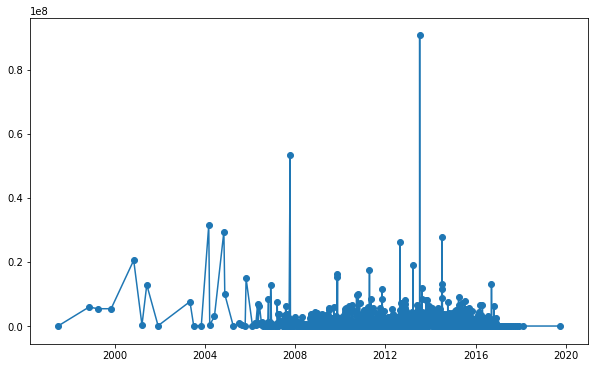

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(subset.groupby('ReleaseDate').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseDate').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(subset.groupby('ReleaseDate').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseDate').agg({'SteamSpyOwners': sum}).values))

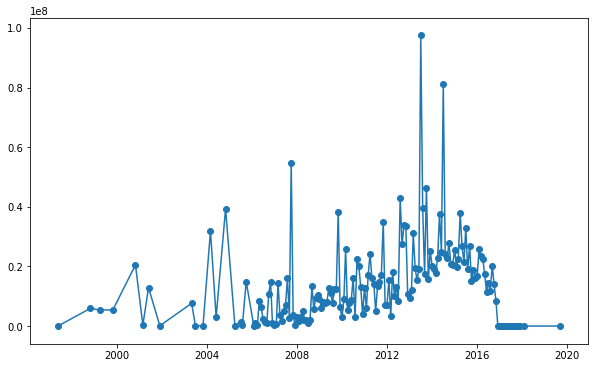

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(subset.groupby('Year&Month').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('Year&Month').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(subset.groupby('Year&Month').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('Year&Month').agg({'SteamSpyOwners': sum}).values))
#ax.barh(list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
        #list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum})))

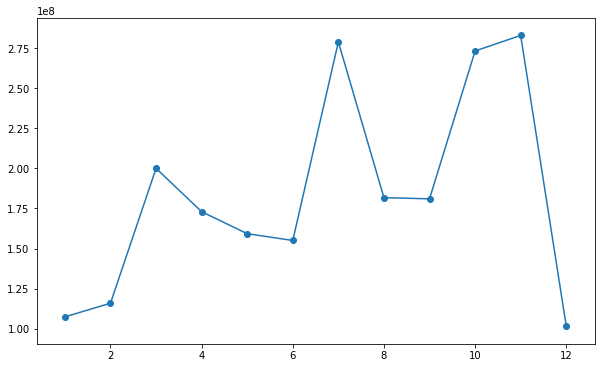

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).values))
#ax.barh(list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
        #list(subset.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum})))

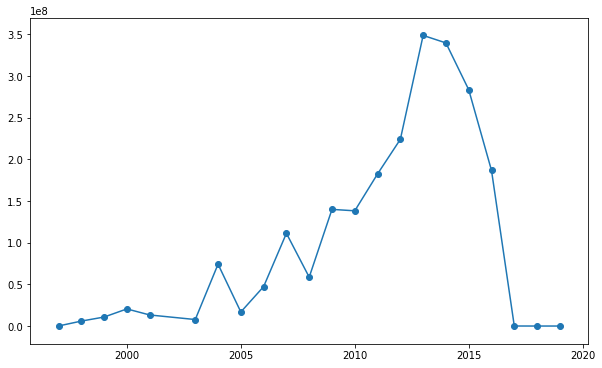

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).index),
                list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).values))  
#ax.bar(list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).index),
 #               list(subset.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).values))

## metacritic
1. exponential relationship, need to explore
2. agg by sum, mean, median, make different plots

In [17]:
subset1 = df.loc[df['Metacritic'] != 0]

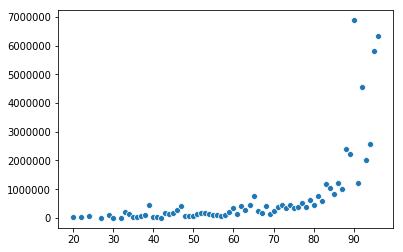

In [18]:
sns.scatterplot(list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'mean'}).index), 
               list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'mean'}).values))

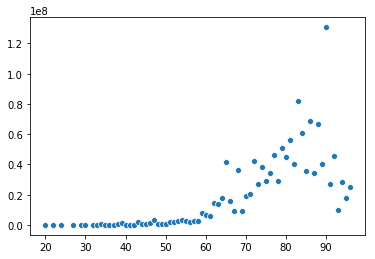

In [19]:
sns.scatterplot(list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'sum'}).index), 
               list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'sum'}).values))

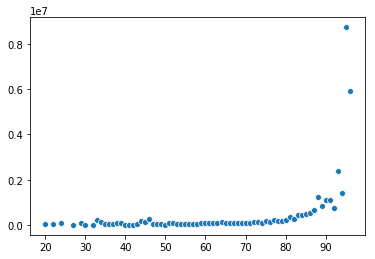

In [20]:
sns.scatterplot(list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'median'}).index), 
               list(subset1.groupby('Metacritic').agg({'SteamSpyOwners': 'median'}).values))

box plot between has metacritic or not have it
play around with the percentile

In [21]:
subset2 = df[['Metacritic', 'SteamSpyOwners']].copy()
subset2.loc[:, 'HasMetacritic'] = subset2.loc[:, 'Metacritic'] != 0

In [22]:
lower, upper = np.percentile(subset2['SteamSpyOwners'], 25), np.percentile(subset2['SteamSpyOwners'], 75)

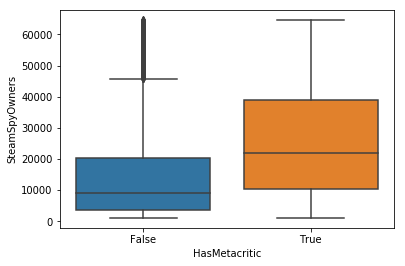

In [23]:
sns.boxplot(x="HasMetacritic", y="SteamSpyOwners", data=subset2.loc[(subset2['SteamSpyOwners'] >= lower)
                                                                    & (subset2['SteamSpyOwners'] <= upper)])


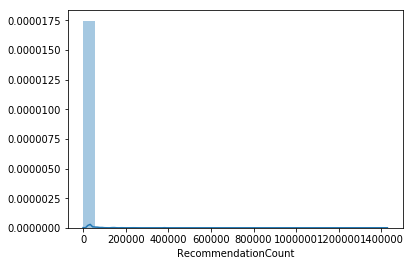

In [24]:
sns.distplot(df['RecommendationCount'], bins = 25)

In [37]:
lower, upper = df['RecommendationCount'].quantile([0.3, 0.7])
recommended = df[(df['RecommendationCount'] > lower) & (df['RecommendationCount'] <= upper)]
recommended



,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,RecommendationCount,PublisherCount,...,PriceCurrency,PriceInitial,PriceFinal,AboutText,Background,ShortDescrip,DetailedDescrip,DRMNotice,Reviews,SupportedLanguages
38,Dangerous Waters,2006-02-07,0,0,1,0,82,1,112,1,...,USD,14.99,14.99,S.C.S. - Dangerous Waters allows you total con...,http://cdn.akamai.steamstatic.com/steam/apps/1...,,S.C.S. - Dangerous Waters allows you total con...,,,English
62,HeXen: Beyond Heretic,2007-08-03,0,0,1,0,0,0,158,1,...,USD,4.99,4.99,While you were battling the evil forces of DSp...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,While you were battling the evil forces of DSp...,,,English
74,Vigil: Blood Bitterness(tm),2007-06-29,0,1,1,0,61,0,129,0,...,,0.00,0.00,Vigil: Blood Bitterness plunges you into the d...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,Vigil: Blood Bitterness plunges you into the d...,,,English
82,Act of War: Direct Action,2008-03-12,0,0,1,0,82,0,109,1,...,USD,2.99,2.99,Tomorrows War Is NOWRipped from todays headlin...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,Tomorrows War Is NOWRipped from todays headlin...,,,English
88,X: Beyond the Frontier,2010-10-08,0,0,1,0,67,1,136,1,...,USD,4.99,4.99,The Human Race had advanced to the point where...,http://cdn.akamai.steamstatic.com/steam/apps/2...,,The Human Race had advanced to the point where...,,,English* German**languages with full audio sup...
96,Xpand Rally,2006-08-24,0,0,1,0,82,0,116,1,...,USD,4.99,4.99,Xpand Rally is a breathtaking game that gives ...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Xpand Rally is a breathtaking game that gives ...,,,English
102,Genesis Rising,2007-08-06,0,0,1,0,57,0,103,1,...,USD,4.99,4.99,Three thousand years in the future mankind has...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Three thousand years in the future mankind has...,,,English
108,Zuma Deluxe,2006-08-30,0,1,1,0,0,0,118,1,...,USD,4.99,4.99,Survive the ancient temples of Zuma the critic...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,Survive the ancient temples of Zuma the critic...,,,English French German Italian Spanish
113,Feeding Frenzy 2 Deluxe,2006-08-30,0,1,1,0,0,0,159,1,...,USD,4.99,4.99,,http://cdn.akamai.steamstatic.com/steam/apps/3...,,,,,English
133,Escape Rosecliff Island,2009-04-15,0,1,1,0,0,0,124,1,...,USD,4.99,4.99,An unexpected storm has left you shipwrecked o...,http://cdn.akamai.steamstatic.com/steam/apps/3...,,An unexpected storm has left you shipwrecked o...,,,English


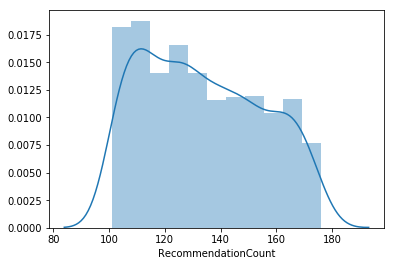

In [38]:
sns.distplot(recommended['RecommendationCount'])

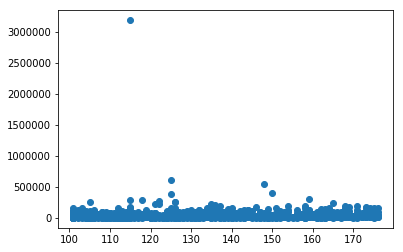

In [39]:
plt.scatter(x = 'RecommendationCount', y = 'SteamSpyOwners', data = recommended)

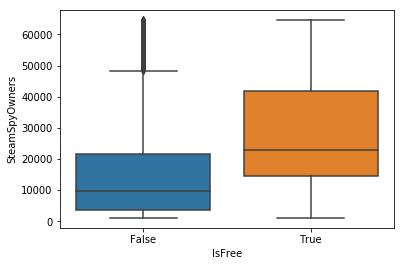

In [44]:
# IsFree and number of owners
lower, upper = df['SteamSpyOwners'].quantile([0.25, 0.75])
sns.boxplot(x="IsFree", y="SteamSpyOwners", data=df[(df['SteamSpyOwners'] >= lower) & (df['SteamSpyOwners'] <= upper)])

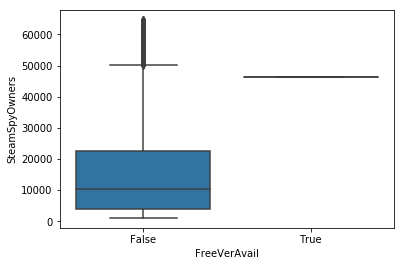

In [47]:
lower, upper = df['SteamSpyOwners'].quantile([0.25, 0.75])
sns.boxplot(x="FreeVerAvail", y="SteamSpyOwners", data=df[(df['SteamSpyOwners'] >= lower) & (df['SteamSpyOwners'] <= upper)])

### data more skewed to the left, need more data after 2016

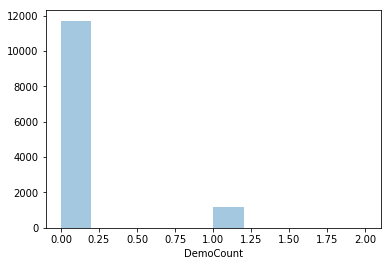

In [206]:
sns.distplot(df['DemoCount'], hist = True, kde = False, bins = 10)

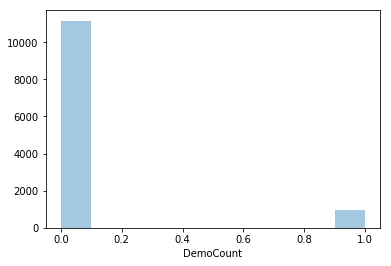

In [31]:
sns.distplot(df['DemoCount'], hist = True, kde = False, bins = 10)

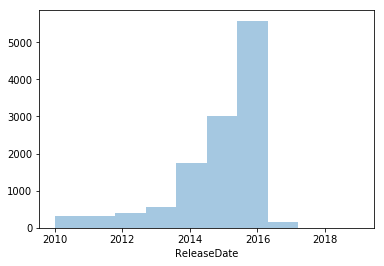

In [26]:
sns.distplot(df['ReleaseDate'].dt.year, hist = True, kde = False, bins = 10)

In [28]:
df['RequiredAge'].value_counts()

0     11514
17      348
13       78
18       78
16       37
15        9
12        9
10        9
14        2
6         2
7         1
1         1
Name: RequiredAge, dtype: int64

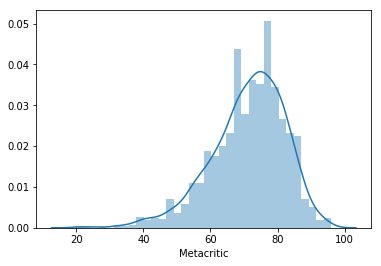

In [44]:
sns.distplot(df.loc[df['Metacritic'] >0]['Metacritic'], hist = True)

In [75]:
copy = df.copy()
copy['Has Metacritic'] = copy.apply(lambda x: True if x['Metacritic'] > 0 else False, axis = 1)

In [79]:
copy.groupby('Has Metacritic').median()['SteamSpyOwners']

Has Metacritic
False      5919.0
True     117922.5
Name: SteamSpyOwners, dtype: float64

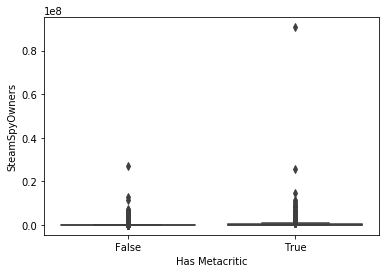

In [76]:
import matplotlib.pyplot as plt
sns.boxplot(copy['Has Metacritic'], copy['SteamSpyOwners'])

In [55]:
(df[(df['Metacritic'] == 0) & (df['DLCCount'] == 0)].SteamSpyOwners != 0).sum()

6606

In [53]:
df[(df['Metacritic'] == 0) & (df['DLCCount'] == 0)].SteamSpyOwners.shape

(8902,)

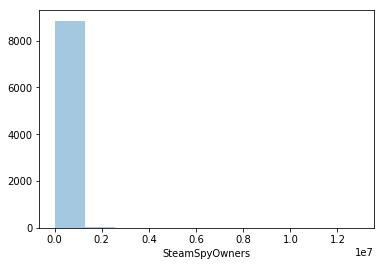

In [58]:
sns.distplot(df[(df['Metacritic'] == 0) & (df['DLCCount'] == 0)].SteamSpyOwners, hist = True, kde = False, bins = 10)

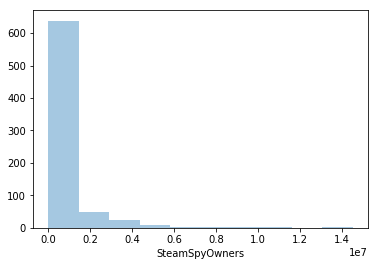

In [60]:
sns.distplot(df[(df['Metacritic'] != 0) & (df['DLCCount'] != 0)].SteamSpyOwners, hist = True, kde = False, bins = 10)

In [30]:
df.columns

Index(['ResponseName', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'RecommendationCount', 'PublisherCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
       'SteamSpyPlayersVariance', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac',
       'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop',
       'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceCurrency',
       'PriceInitial', 'PriceFinal', 'AboutText', 'Background', 'ShortDes